<a href="https://colab.research.google.com/github/clustering-jun/GNU-MachineLearning/blob/main/L12_2_DBSCAN%EA%B3%BC_%EA%B3%84%EC%B8%B5%EC%A0%81_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **DBSCAN 모델 구현**

In [5]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

iris = datasets.load_iris()
features = iris.data

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

model = DBSCAN(eps = 0.5, min_samples = 5, metric = 'euclidean', n_jobs = -1)
model.fit(features_scaled)

DBSCAN(n_jobs=-1)

In [6]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1])

In [10]:
model.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  12,  17,
        19,  20,  21,  23,  24,  25,  26,  27,  28,  29,  30,  31,  34,
        35,  36,  37,  38,  39,  40,  42,  43,  44,  45,  46,  47,  48,
        49,  52,  54,  55,  58,  61,  63,  64,  65,  66,  67,  69,  71,
        73,  74,  75,  77,  78,  79,  80,  81,  82,  83,  86,  88,  89,
        90,  91,  92,  94,  95,  96,  97,  99, 101, 103, 104, 110, 111,
       112, 116, 120, 123, 126, 133, 137, 138, 139, 140, 141, 142, 143,
       145, 147])

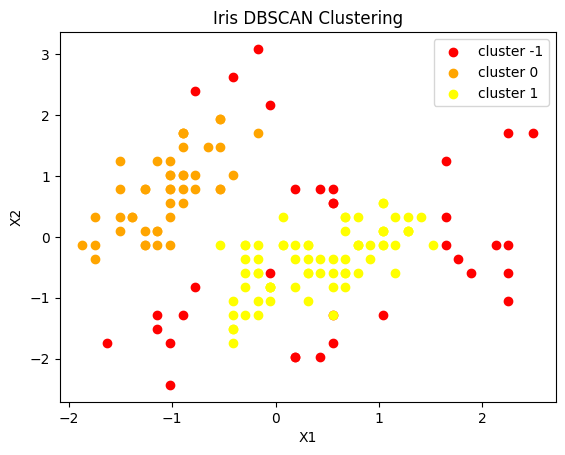

In [11]:
import numpy as np
import matplotlib.pyplot as plt

index_o = np.where(model.labels_ == -1)
index_0 = np.where(model.labels_ == 0)
index_1 = np.where(model.labels_ == 1)

plt.scatter(features_scaled[:, 0][index_o], features_scaled[:, 1][index_o], c= 'red', label = "cluster -1")
plt.scatter(features_scaled[:, 0][index_0], features_scaled[:, 1][index_0], c= 'orange', label = "cluster 0")
plt.scatter(features_scaled[:, 0][index_1], features_scaled[:, 1][index_1], c= 'yellow', label = "cluster 1")

plt.title('Iris DBSCAN Clustering')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'best')
plt.show()

### **엘보우 방법 적용**

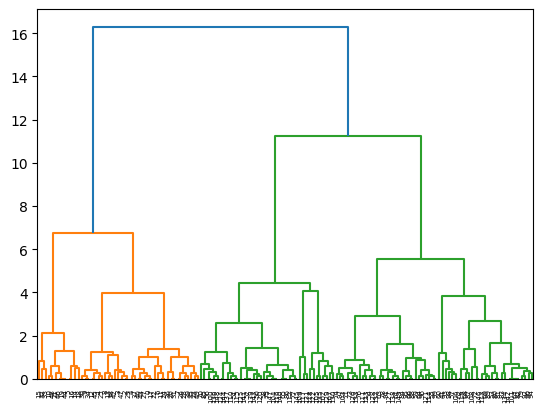

In [13]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

iris = datasets.load_iris()
features = iris.data[:, :2]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

linked = linkage(features_scaled, method = 'ward')
dendrogram(linked)
plt.show()

### **병합 군집화 모델 구현**

In [21]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

iris = datasets.load_iris()
features = iris.data

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

model = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
model.fit(features_scaled)

AgglomerativeClustering(n_clusters=3)

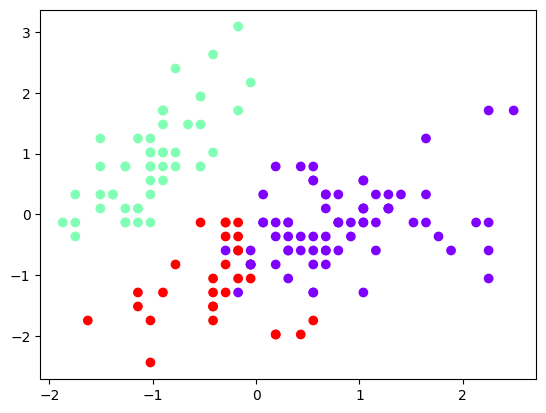

In [22]:
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c = model.labels_, cmap='rainbow')
plt.show()

### **연습 문제**
- 아래의 코드를 참고하여 **덴드로그램**을 그려보시오.

In [24]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

titanic = pd.read_csv('titanic.csv')
titanic = titanic.dropna()

features = titanic[["Age", "Fare"]]

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

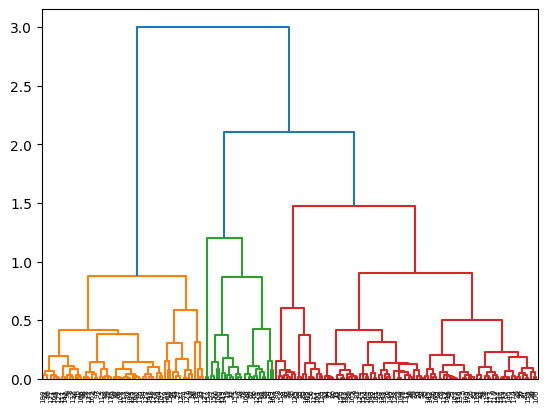

In [25]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(features_scaled, method = 'ward')
dendrogram(linked)
plt.show()

- **DBSCAN, 병합 군집화 모델**도 구현해 봄.

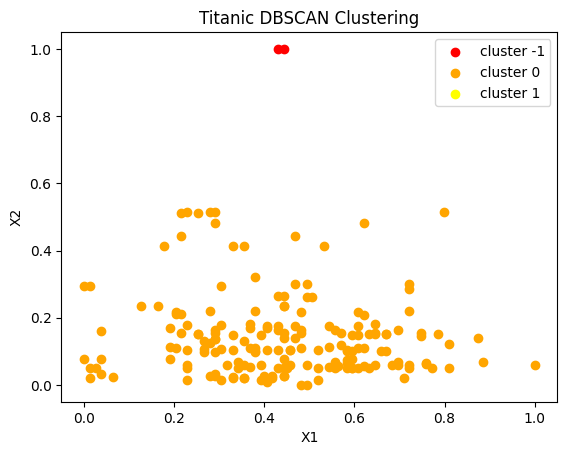

In [26]:
# DBSCAN
import numpy as np
import matplotlib.pyplot as plt

model = DBSCAN(eps = 0.5, min_samples = 5, metric = 'euclidean', n_jobs = -1)
model.fit(features_scaled)

index_o = np.where(model.labels_ == -1)
index_0 = np.where(model.labels_ == 0)
index_1 = np.where(model.labels_ == 1)

plt.scatter(features_scaled[:, 0][index_o], features_scaled[:, 1][index_o], c= 'red', label = "cluster -1")
plt.scatter(features_scaled[:, 0][index_0], features_scaled[:, 1][index_0], c= 'orange', label = "cluster 0")
plt.scatter(features_scaled[:, 0][index_1], features_scaled[:, 1][index_1], c= 'yellow', label = "cluster 1")

plt.title('Titanic DBSCAN Clustering')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'best')
plt.show()

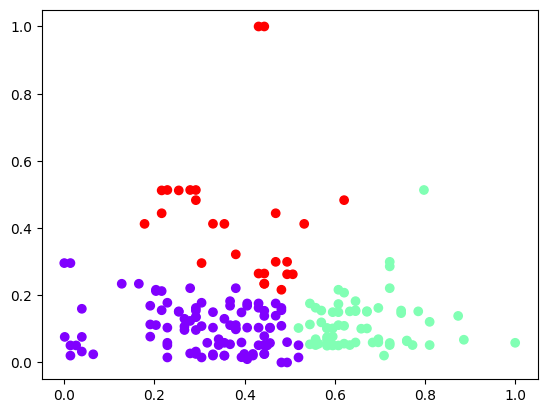

In [27]:
# AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
model.fit(features_scaled)

plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c = model.labels_, cmap='rainbow')
plt.show()